In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
house_price_df=pd.read_csv('/content/BostonHousing (1).csv')

In [3]:
house_price_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
house_price_df.shape
house_price_df.rename(columns={'medv':'price'},inplace=True)

In [5]:
house_price_df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [6]:
house_price_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#understanding the correlation bw various features in the dataset

In [8]:
#1.positive corr->directly prop 2.neg corr->inv prop

In [9]:
corr=house_price_df.corr()

In [10]:
print(corr)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

In [11]:
#constructing a heatmap to understand the correlation

<Axes: >

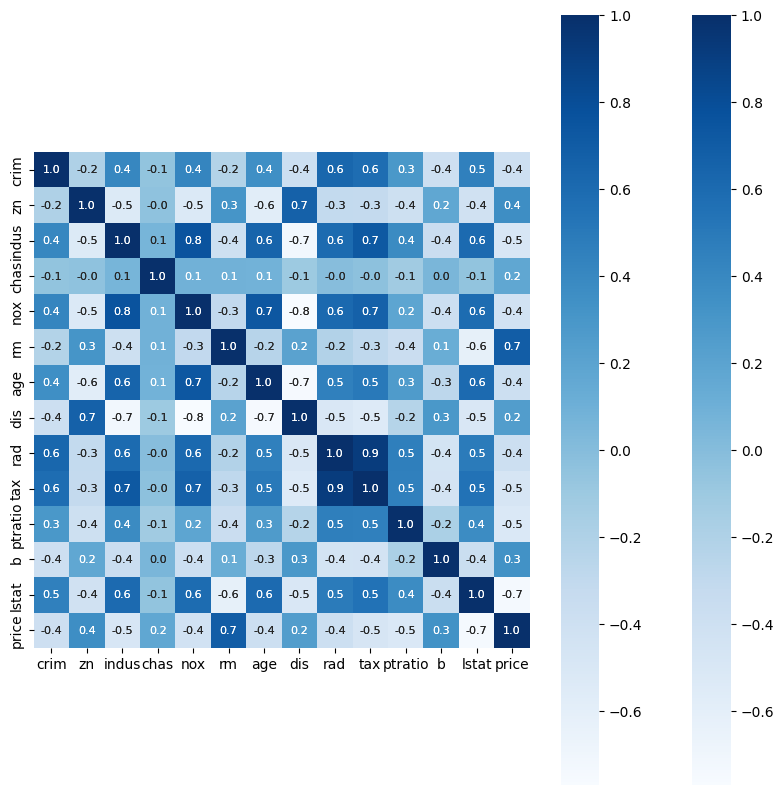

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={
    'size':8},cmap='Blues'
)
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={
    'size':8
},cmap='Blues')

In [13]:
#split into train_test_data

In [14]:
X=house_price_df.drop('price',axis=1)
Y=house_price_df['price']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
#Model training - XGBoost Regressor

In [17]:
model=XGBRegressor()

In [18]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [19]:
#Evaluation->we cannot use accuracy_score over here in regression because the value that we get is a continuous value so we cant eval it using acc_score for example in rock vs mine pred we used acc_score because the final val is dicrete either rock or mine but over here the cost of house differs

#LogisticRegression doesnt mean that it train regression val, it trains only dicrete val like Y,N   0,1 ETC

In [20]:
#prediction on traing data
#accuracy for prediction on training data
training_data_prediction=model.predict(X_train)

In [21]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [22]:
#comparing the predicted data with the y train

In [23]:
#for regression problems we use R squared error to find the acc

In [24]:
sc_1=metrics.r2_score(Y_train,training_data_prediction)

In [25]:
#Mean absolute error

sc_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

In [26]:
print(sc_1)
print(sc_2)

0.9999980039471451
0.0091330346494618


In [27]:
#prediction on test_data
test_data_prediction=model.predict(X_test)

In [28]:
sc_1=metrics.r2_score(Y_test,test_data_prediction)
sc_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [29]:
print(sc_1)
print(sc_2)

0.9051721149855378
2.0748727686264927


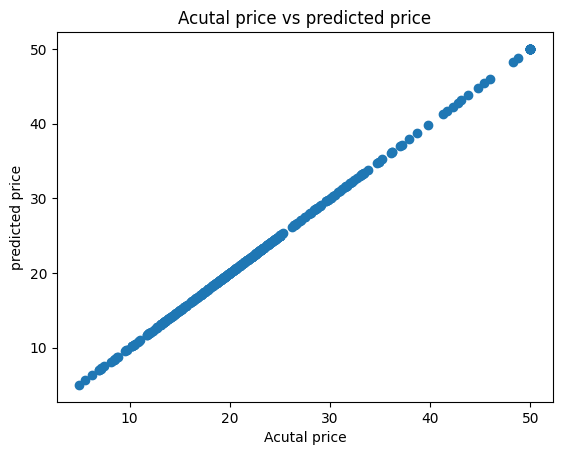

In [30]:
#visualizing the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Acutal price')
plt.ylabel('predicted price')
plt.title('Acutal price vs predicted price')
plt.show()